from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# For Accountants who deal with big data dump from the IS department

To analyze huge data set with endless rows and columns from the data dump, how to use Python to extract the data and perform the meaningful analysis? How to visualize the financial analysis? 
The example illustrated here is in csv or xlsx format since most likely that IS department would only provide the output data in either format.
Topic: 
-  Use Python to import data in CSV or Excel format
-  To merge, reshape, clean data for analysis
-  Data validation by using Python panda commends functio max, min, average etc. 
-  Put data in SQL Lite format for data analysis
-  Use Visio to mockup report for report specification




(A) Use Python to Import dataset in CSV or Excel format

I use 2 sample data files,
•	First sample data is 2015 USA census with 20,000 rows and 150 columns
•	Second sample data is 10 stocks historical daily price from 1990-2011

1.	How to use Python to read Excel file? 
For example, you get a huge dataset from IS department, when you glance the excel file, your head spin.  The file has endless rows and columns and you need to analysis the data in the timely basis. 

Step 1:
Say the excel file name called “sample.xlsx” with 20,000 rows and 150 columns.
This sample data is from gov.org - 2015 census data by zip code. For illustration purpose, the excel file saved the first 1,000 rows and 150 columns.



In [3]:
import pandas as pd
df = pd.read_excel('../extra/sample.xlsx')
df.head(5)


,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
0,1,New Hampshere,0,1,836320,481570,109790,233260,455560,1356760,...,328469,0,0,0,0,61920,48150,732670,1933120,1427680
1,1,New Yok,0,2,494830,206630,146250,129390,275920,1010990,...,965011,0,0,0,0,73720,107304,415410,1187403,847710
2,1,Floria,0,3,261250,80720,139280,36130,155100,583910,...,1333418,0,0,0,0,64200,139598,193030,536699,481250
3,1,New York,0,4,166690,28510,124650,10630,99950,423990,...,1414283,0,0,0,0,45460,128823,116440,377177,319850
4,1,New York,0,5,212660,19520,184320,4830,126860,589490,...,3820152,420,168,60,31,83330,421004,121570,483682,416500


In [ ]:
Step 2: An interesting note – there are several ways to read Excel file from Python Pandas. 
pd = pd.read_excel(“sample.xlsx”)
or
pd = pd.ExcelFile(‘sample.xlsx’)

Both commands can read Excel file.

Which command should you use?
•	You can use Pandas Timeit to time how long does it take to run the reports
•	General speaking, read_excel commands is faster


In [4]:
def test_excelfile():
    df = pd.ExcelFile('../extra/sample.xlsx')  # this code is faster...use panda timeit library to compare 
    
def test_read_excel():
    df = pd.read_excel("../extra/sample.xlsx")

print("test_excelfile(): time=")
%timeit test_excelfile()
%timeit test_read_excel()

test_excelfile(): time=
633 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
729 ms ± 26.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Step 3: How to filter data in Python, quick and save time instead of Excel? If you need to see the first three rows for zip code 35210:


In [9]:
df[df["zipcode"]==35210].head()

,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
564,1,AL,35210,1,2420,1520,260,600,1250,3760,...,1015,0,0,0,0,250,210,2030,4969,4200
565,1,AL,35210,2,1840,980,370,410,860,3400,...,4265,0,0,0,0,340,544,1480,3663,3190
566,1,AL,35210,3,1020,430,400,150,490,1940,...,5792,0,0,0,0,290,677,700,1818,1850
567,1,AL,35210,4,580,160,350,50,290,1230,...,5443,0,0,0,0,190,484,370,1106,1090
568,1,AL,35210,5,690,130,540,20,370,1600,...,12233,0,0,0,0,290,1102,370,1374,1360


In [ ]:
# 10 stocks historical price from 1990-2011
Step 1: Import pandas and read the Excel file (specified the directory)
             This sample file is stock market value file with 100 stocks.
To view the first and last 5 rows of data


In [6]:
df = pd.read_excel('../extra/Stock_px.xlsx')
df.head(5)

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
0,1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12,ABC Inc.
1,1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24,XYZ Inc.
2,1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25,Fidelity
3,1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23,TD American
4,1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33,ABC Inc.


In [5]:
df.tail(5)

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
5467,2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28,TD Bank
5468,2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27,ABC Inc.
5469,2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16,XYZ Inc.
5470,2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37,Fidelity
5471,2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11,TD Bank


In [ ]:
#Step 2:  Sum up stock price of AA, AAPL and GE 

In [6]:
df["total"] = df["AA"] + df["AAPL"] + df["GE"]
df.tail(5)    

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker,total
5467,2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28,TD Bank,415.04
5468,2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27,ABC Inc.,426.73
5469,2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16,XYZ Inc.,428.64
5470,2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37,Fidelity,434.75
5471,2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11,TD Bank,448.86


In [ ]:
# Step 3: data analysis – it’s easy to get the min, max in Python
            -  The minimum stock price of Apple between 2/1/1990 and 10/14/2011 was $4.2
            -  The maximum stock price of Apple between 2/1/1990 and 10/14/2011 was $43.619


In [7]:
df["AA"].sum(), df["AA"].mean(),df["AA"].min(),df["AA"].max() 

(95433.239999999991, 17.44028508771932, 4.2000000000000002, 43.619999999999997)

In [ ]:
# Step 4: import matplot pyplot to get the chart
 -  first to set index
 -  to chart stock AA with date    

In [8]:
df.set_index('DATE', inplace=True)
df.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker,total
DATE,,,,,,,,,,,
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12,ABC Inc.,15.71
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24,XYZ Inc.,15.91
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25,Fidelity,16.12
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23,TD American,16.01
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33,ABC Inc.,15.72


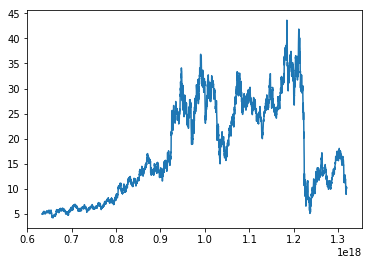

In [9]:
plt.plot(df['AA'])



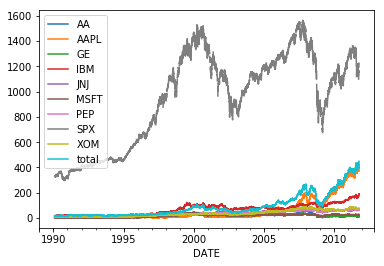

In [10]:
## ref: https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/
# D means date
df.resample('D').sum().plot()

In [17]:
# Set Index - only need certain columns
df.set_index(['AA','AAPL','GE','IBM','JNJ','MSFT','PEP','SPX','XOM','Broker']) 
dfNew = df[['AA','MSFT']]
dfNew.head()


,AA,MSFT
DATE,,
1990-02-01,4.98,0.51
1990-02-02,5.04,0.51
1990-02-05,5.07,0.51
1990-02-06,5.01,0.51
1990-02-07,5.04,0.51
